In [58]:
# Useful imports
import pandas as pd
import matplotlib.pylab as plt
import ltspice
import numpy as np
plt.ion()

Now with overplotting using the ltspice python library, instead of just spot checking at a couple of frequencies as in [ad797a_noisevalidation.ipynb](ad797a_noisevalidation.ipynb).  Also using a better test bench to extract input-referred current noise.


# Input referred AD797A voltage noise

Working with circuit defined in ad797a_vnoisevalidation.asc.  Comparing simulated input referred voltage noise to [datasheet](https://www.analog.com/media/en/technical-documentation/data-sheets/AD797.pdf):

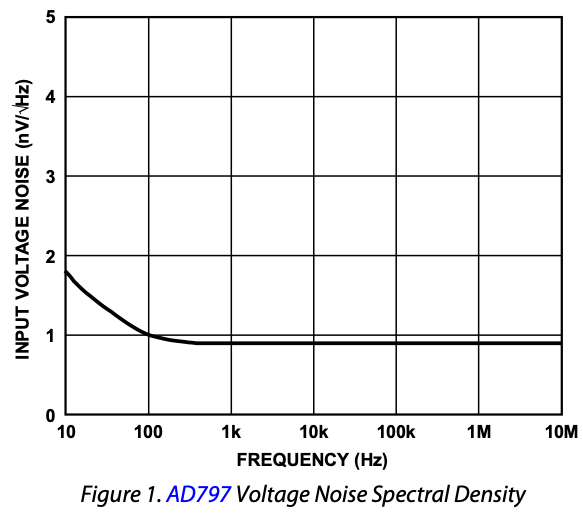

Load data extracted from datasheet using [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/):

In [40]:
#dvn=datasheet vnoise
dvndf = pd.read_csv('ad797a_datasheet_vnoise.csv',names=['f','nVrtHz'])

Ran these commands to sort after extracting;
```
sort -k1 -n -t, ad797a_datasheet_vnoise.csv > ad797a_datasheet_vnoise2.csv
mv ad797a_datasheet_vnoise2.csv ad797a_datasheet_vnoise.csv
```

Text(0, 0.5, 'Input Voltage Noise (nV/rt.Hz)')

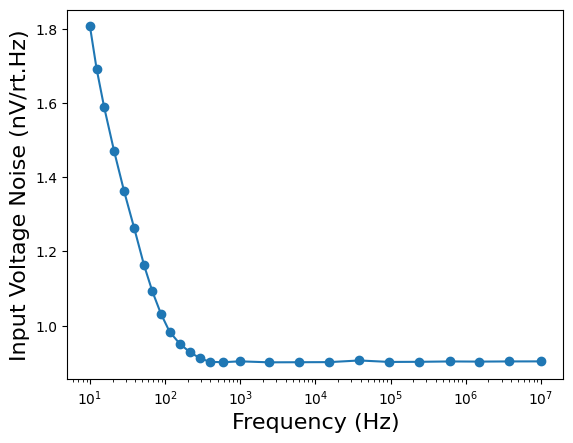

In [41]:
plt.semilogx(dvndf['f'].values,dvndf['nVrtHz'].values)
plt.scatter(dvndf['f'].values,dvndf['nVrtHz'].values)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Input Voltage Noise (nV/rt.Hz)',fontsize=16)

Test circuit [ad797a_vnoisevalidation.asc](ad797a_vnoisevalidation.asc):

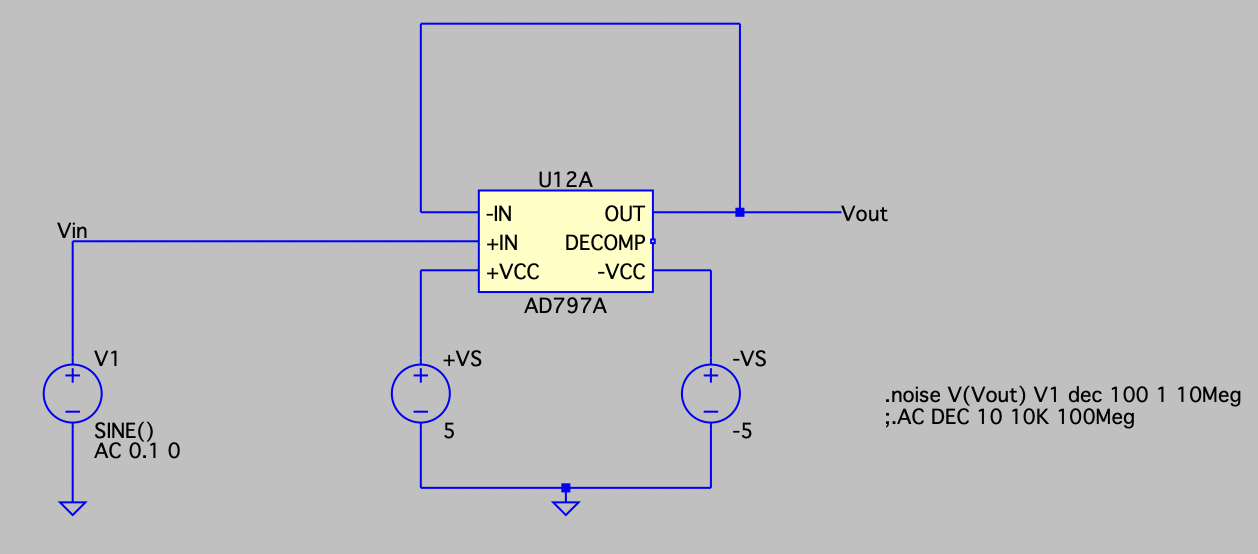

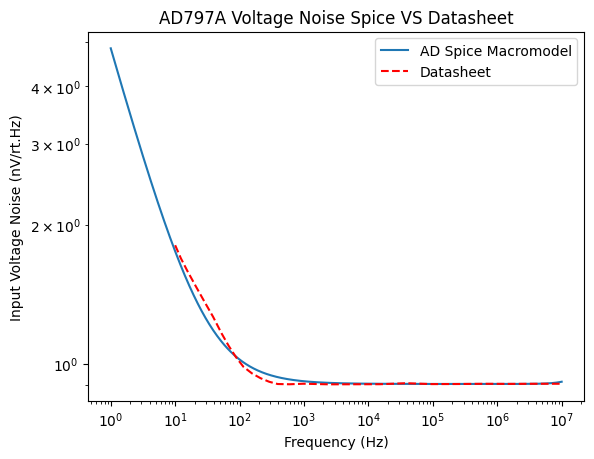

In [42]:
#
# Overplot datasheet & model.  LTSpice must be open and sim must have been run.
#

## Model
ascpath = 'ad797a_noisevalidation.raw'
l = ltspice.Ltspice(ascpath)
l.parse() # Data loading sequence. It may take few minutes for huge file.

frequency = l.get_frequency()    
vinoise = l.get_data('V(inoise)')
#    plt.plot(mint+time*1.e9,2.*vtdr,'r--') # 2x here because fcn gen outputs 2x the programmed signal in 50 Ohm mode#

plt.loglog(frequency,vinoise*1.e9,label='AD Spice Macromodel')

plt.xlabel('Frequency (Hz)')
#plt.xlim(mint,maxt)
plt.ylabel('Input Voltage Noise (nV/rt.Hz)')

## Data
plt.loglog(dvndf['f'].values,dvndf['nVrtHz'].values,'r--',label='Datasheet')

plt.title('AD797A Voltage Noise Spice VS Datasheet')
plt.legend(loc='upper right')


Looks pretty good.


# Input referred AD797A current noise

Comparing simulated input referred current noise to [datasheet](https://www.analog.com/media/en/technical-documentation/data-sheets/AD797.pdf):

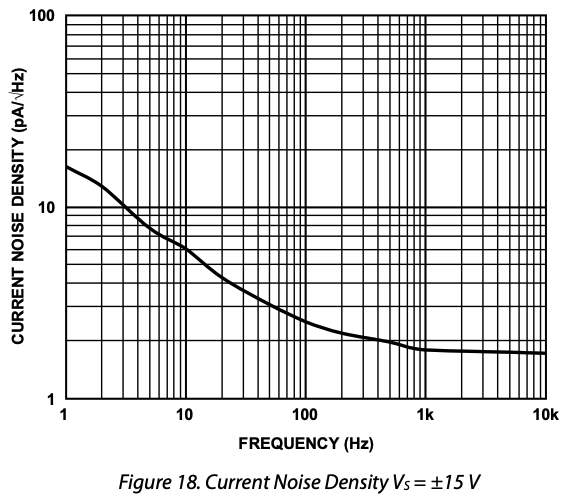

Load data extracted from datasheet using [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/):

In [43]:
#din=datasheet inoise
dindf = pd.read_csv('ad797a_datasheet_inoise.csv',names=['f','pArtHz'])

Ran these commands to sort after extracting;
```
sort -k1 -n -t, ad797a_datasheet_inoise.csv > ad797a_datasheet_inoise2.csv
mv ad797a_datasheet_inoise2.csv ad797a_datasheet_inoise.csv
```

Text(0, 0.5, 'Input Voltage Noise (pA/rt.Hz)')

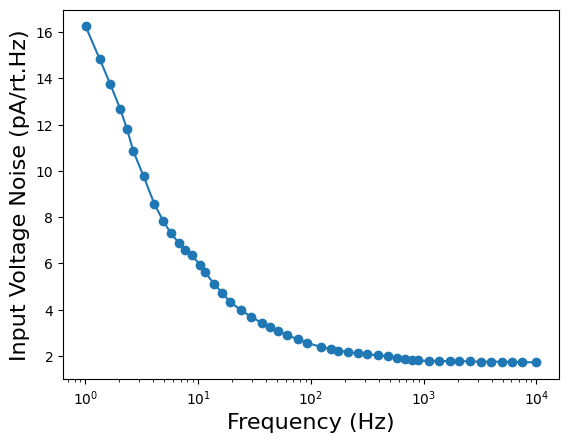

In [46]:
plt.semilogx(dindf['f'].values,dindf['pArtHz'].values)
plt.scatter(dindf['f'].values,dindf['pArtHz'].values)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Input Voltage Noise (pA/rt.Hz)',fontsize=16)

Modelling test circuit off of this post ; https://www.edn.com/designing-with-a-complete-simulation-test-bench-for-op-amps-part-4-noise/:

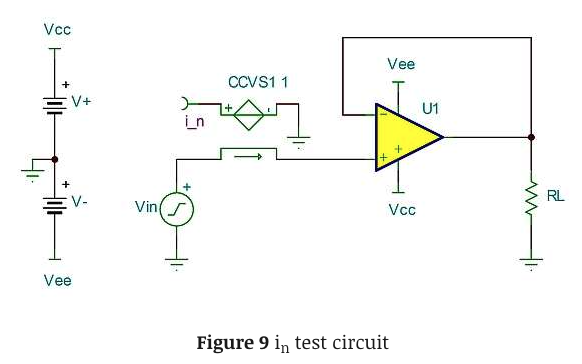

Trying to implement this in [ad797a_inoisevalidation.asc](ad797a_inoisevalidation.asc):
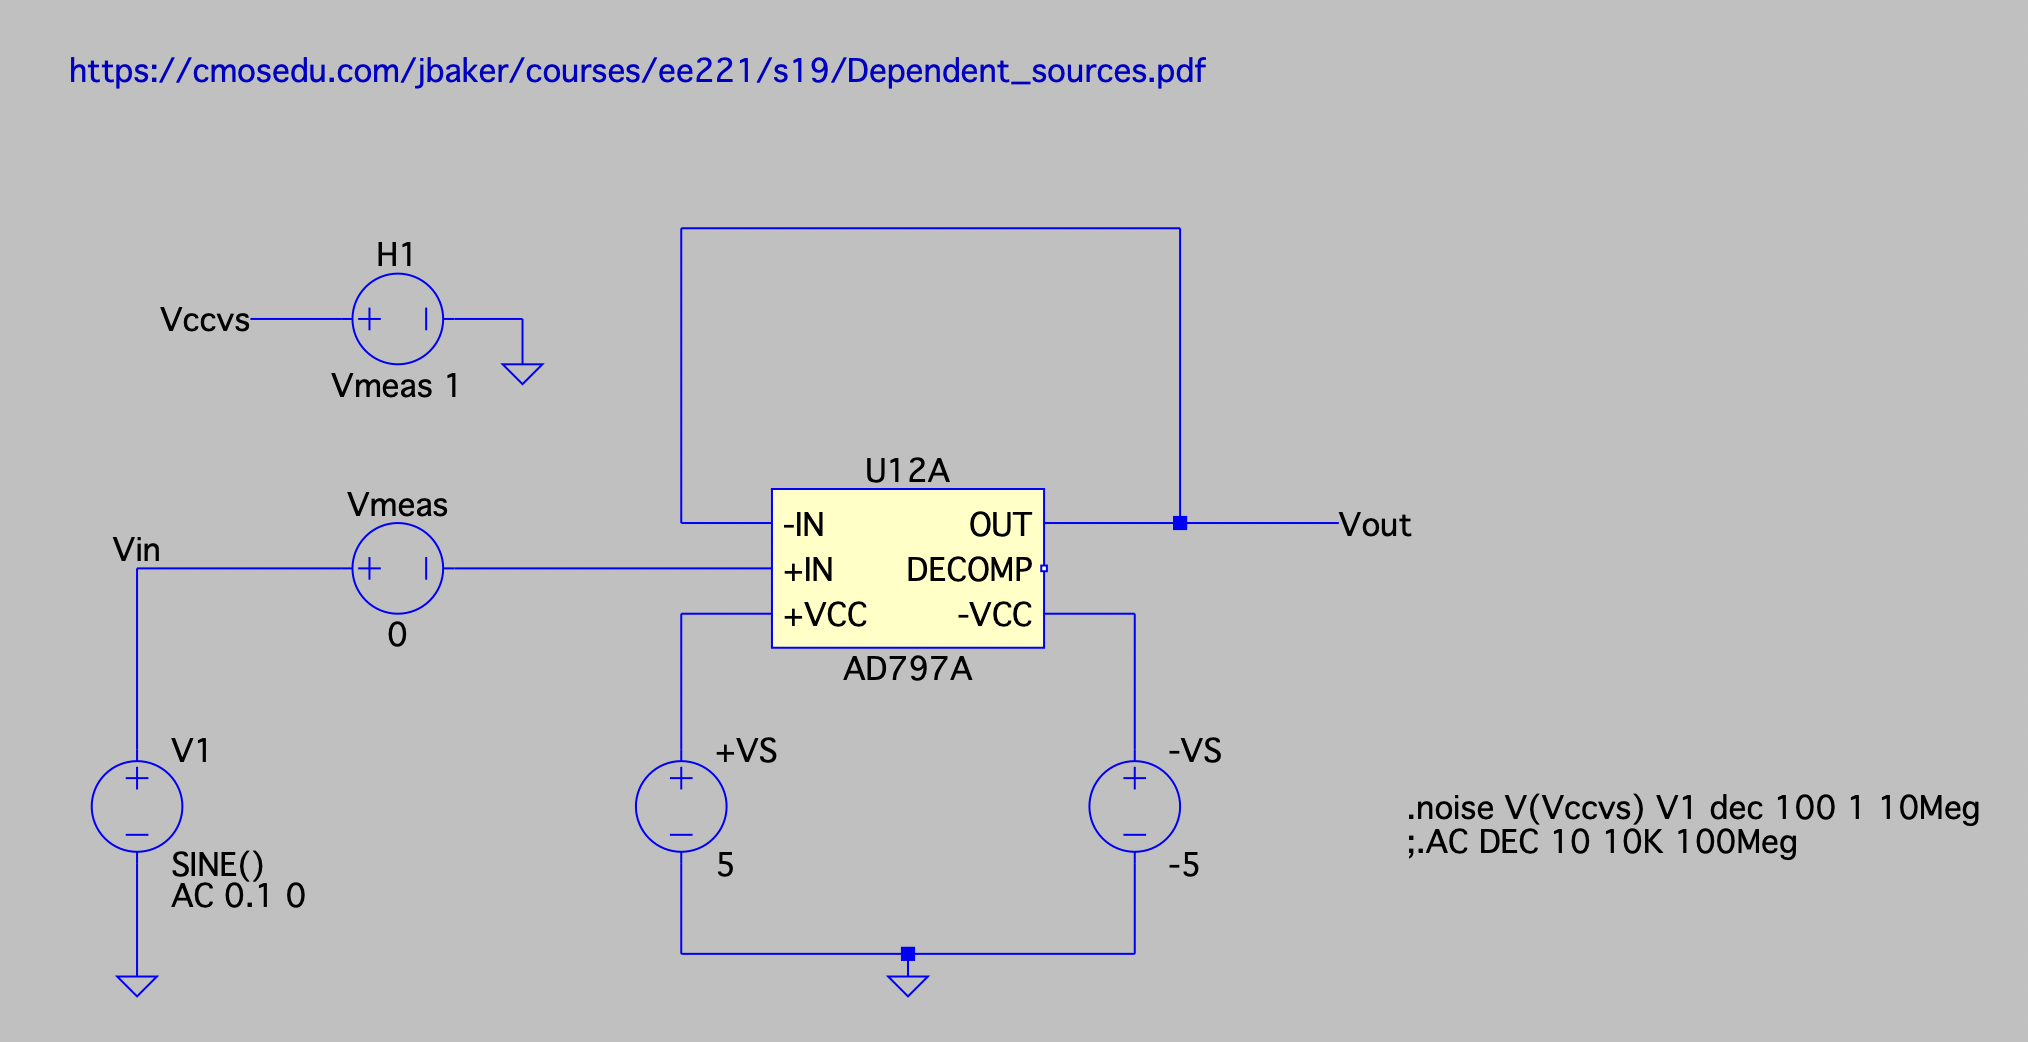

See:

(1, 30)

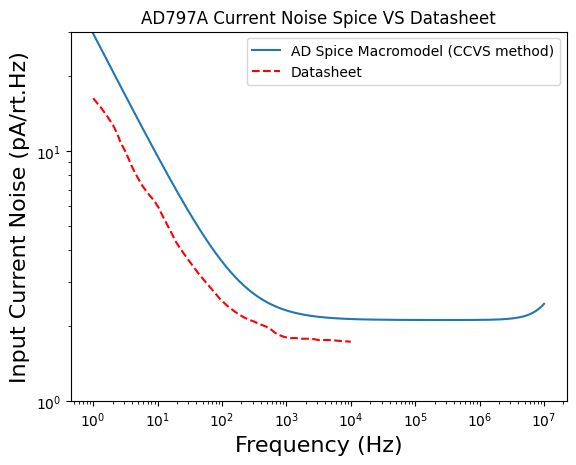

In [62]:
#
# Overplot datasheet & model.  LTSpice must be open and sim must have been run.
#

## Model
ascpath = 'ad797a_inoisevalidation.raw'
l = ltspice.Ltspice(ascpath)
l.parse() # Data loading sequence. It may take few minutes for huge file.

frequency = l.get_frequency()    
vinoise = l.get_data('V(onoise)')

plt.loglog(frequency,vinoise*1.e12,label='AD Spice Macromodel (CCVS method)')

plt.xlabel('Frequency (Hz)',fontsize=16)
#plt.xlim(mint,maxt)
plt.ylabel('Input Current Noise (pA/rt.Hz)',fontsize=16)

# Data
plt.loglog(dindf['f'].values,dindf['pArtHz'].values,'r--',label='Datasheet')

plt.title('AD797A Current Noise Spice VS Datasheet')
plt.legend(loc='upper right')

plt.ylim(1,30)

Not great agreement.  Let's try to extract out of the model with big resistor instead of the CCVS.  Using [ad797a_inoisevalidation_noninvertinginput.asc](ad797a_inoisevalidation_noninvertinginput.asc):
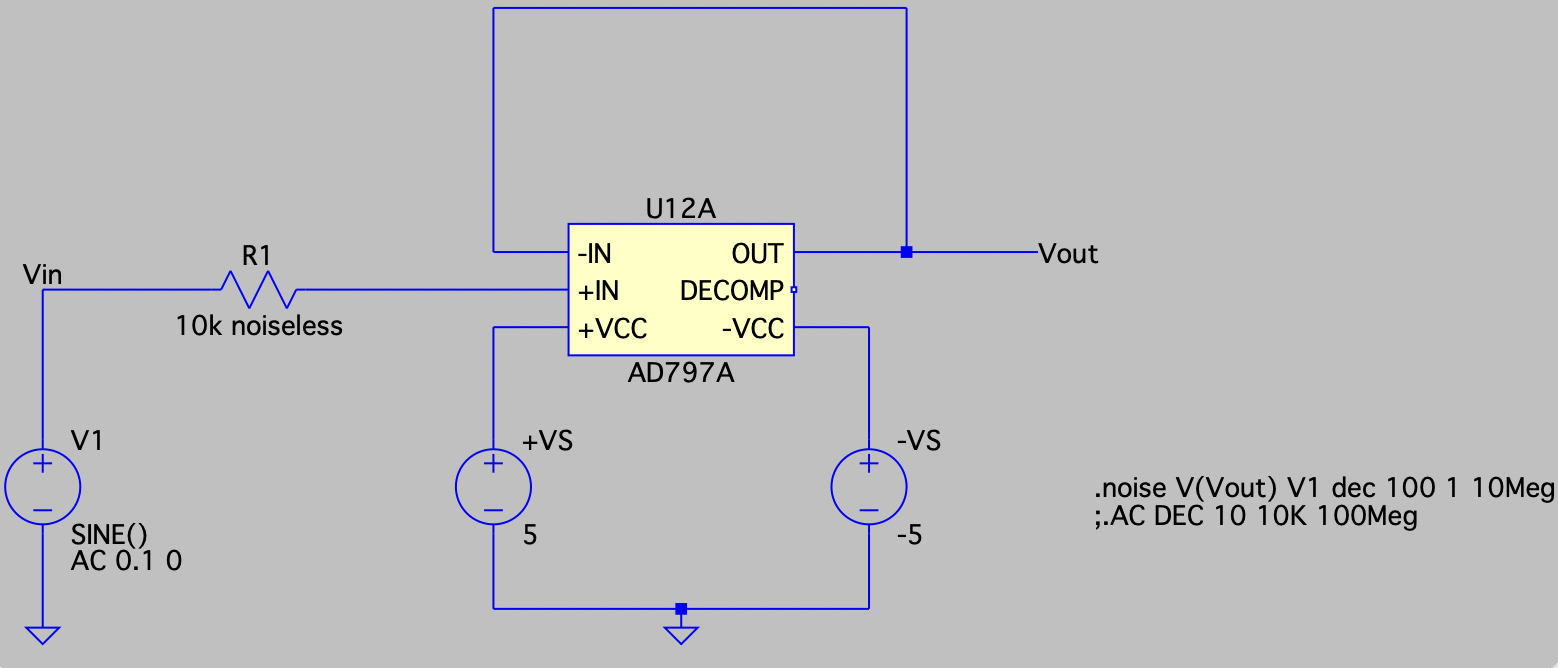

Adding this curve to above plot:

(1, 30)

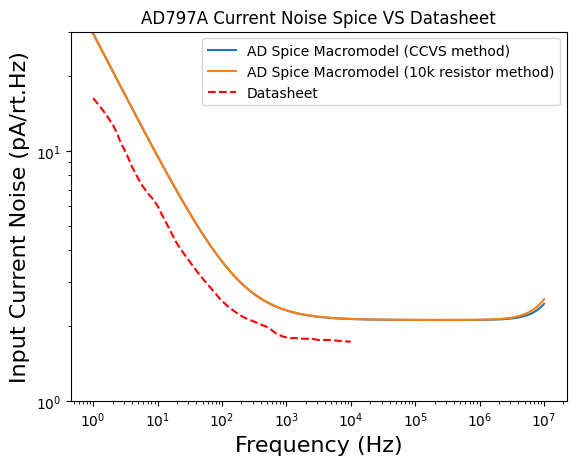

In [71]:
#
# Overplot datasheet & model.  LTSpice must be open and sim must have been run.
#

## CCVS Model
ascpath = 'ad797a_inoisevalidation.raw'
l = ltspice.Ltspice(ascpath)
l.parse() # Data loading sequence. It may take few minutes for huge file.

frequency = l.get_frequency()    
vinoise = l.get_data('V(onoise)')

plt.loglog(frequency,vinoise*1.e12,label='AD Spice Macromodel (CCVS method)')

## 10k resistor Model
ascpath2 = 'ad797a_inoisevalidation_noninvertinginput.raw'
l2 = ltspice.Ltspice(ascpath2)
l2.parse() # Data loading sequence. It may take few minutes for huge file.

frequency2 = l2.get_frequency()    
vinoise2 = l2.get_data('V(inoise)')

plt.loglog(frequency2,vinoise2*1.e12/10e3,label='AD Spice Macromodel (10k resistor method)')

plt.xlabel('Frequency (Hz)',fontsize=16)
#plt.xlim(mint,maxt)
plt.ylabel('Input Current Noise (pA/rt.Hz)',fontsize=16)

# Data
plt.loglog(dindf['f'].values,dindf['pArtHz'].values,'r--',label='Datasheet')

plt.title('AD797A Current Noise Spice VS Datasheet')
plt.legend(loc='upper right')

plt.ylim(1,30)

Looks like this is a model "feature"!